In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
import matplotlib.pyplot as plt

In [2]:
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
for i in range(1,10): #Just Checking change in x_train data
  print(len(x_train[i]))

189
141
550
147
43
123
562
233
130


In [4]:
max_sequence_length = 500
x_train = pad_sequences(x_train, maxlen=max_sequence_length)
x_test = pad_sequences(x_test, maxlen=max_sequence_length)


In [5]:
for i in range(1,10): #Just Checking change in x_train data
  print(len(x_train[i]))

500
500
500
500
500
500
500
500
500


In [6]:
model_names = ['SimpleRNN', 'LSTM', 'GRU']
test_losses = []
test_accuracies = []
histories = []

In [8]:
for model_name, layer in zip(model_names, [SimpleRNN, LSTM, GRU]):
    model = Sequential([
        Embedding(input_dim=num_words, output_dim=32, input_length=max_sequence_length),
        layer(32),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

    histories.append(history)

    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.5998 - loss: 0.6426 - val_accuracy: 0.8308 - val_loss: 0.4020
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.8572 - loss: 0.3437 - val_accuracy: 0.8518 - val_loss: 0.3754
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.9177 - loss: 0.2188 - val_accuracy: 0.8132 - val_loss: 0.4159
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.9352 - loss: 0.1837 - val_accuracy: 0.8442 - val_loss: 0.4347
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.9776 - loss: 0.0768 - val_accuracy: 0.8388 - val_loss: 0.5022
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.9889 - loss: 0.0393 - val_accuracy: 0.8268 - val_loss: 0.5708
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.9945 - loss: 0.0221 - val_accuracy: 0.8368 - val_loss: 0.6160
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.9985 - loss: 0.0093 - 

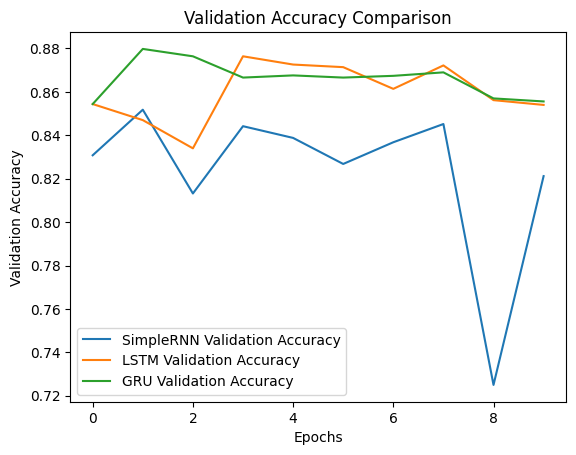

In [9]:
for model_name, history in zip(model_names, histories):
    plt.plot(history.history['val_accuracy'], label=f'{model_name} Validation Accuracy')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()

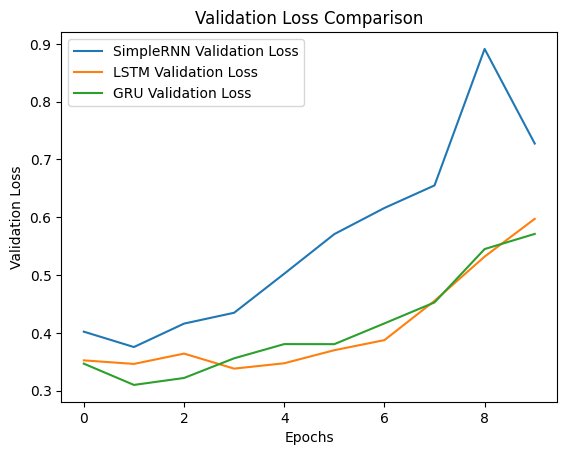

In [10]:
for model_name, history in zip(model_names, histories):
    plt.plot(history.history['val_loss'], label=f'{model_name} Validation Loss')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

In [11]:
for model_name, test_loss, test_accuracy in zip(model_names, test_losses, test_accuracies):
    print(f'{model_name} Test loss: {test_loss}')
    print(f'{model_name} Test accuracy: {test_accuracy}')


SimpleRNN Test loss: 0.7345373630523682
SimpleRNN Test accuracy: 0.8216400146484375
LSTM Test loss: 0.6137306690216064
LSTM Test accuracy: 0.8506799936294556
GRU Test loss: 0.5803370475769043
GRU Test accuracy: 0.8525999784469604
